# Case of Study - Polynomial Regression

### Why is Polynomial Linear Regression "Linear" ? 

The answer lies the equation on how polynomial linear regression is implemented. The outcome y is defined as the linear combination of the independent variables. That's the reason it is linear. The outcome has nothing to do with the non-linearities in the independent variables

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [3]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [4]:
X = df.iloc[:, 1:2]   
y = df.iloc[:, 2]

In [5]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

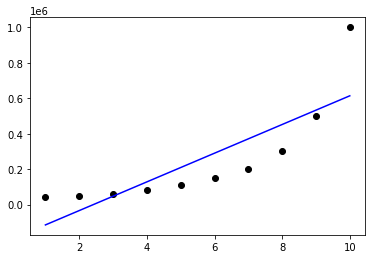

In [6]:
plt.scatter(X, y, color='black')
plt.plot(X, lin_reg.predict(X), color='b')
plt.show()

In [7]:
print("R2 {}".format(r2_score(y, lin_reg.predict(X))))
print("MSE {}".format(mean_squared_error(y, lin_reg.predict(X))))

R2 0.6690412331929895
MSE 26695878787.878788


Add Polynomial features using PolynomialFeatures class from sklearn.preprocessing

In [8]:
# Creating polynomial
poly_reg_2 = PolynomialFeatures(degree=2)
poly_reg_3 = PolynomialFeatures(degree=3)
poly_reg_4 = PolynomialFeatures(degree=4)

# Applying to X
X_poly_2 = poly_reg_2.fit_transform(X)
X_poly_3 = poly_reg_3.fit_transform(X)
X_poly_4 = poly_reg_4.fit_transform(X)

In [9]:
X_poly_2

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Notice that the first column containing 1 is already added automatically

In [10]:
X_poly_3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [11]:
X_poly_4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

Now we can make LinearRegression object using these newly added polynomial features

In [12]:
lin_reg_poly_2 = LinearRegression().fit(X_poly_2, y)
lin_reg_poly_3 = LinearRegression().fit(X_poly_3, y)
lin_reg_poly_4 = LinearRegression().fit(X_poly_4, y)

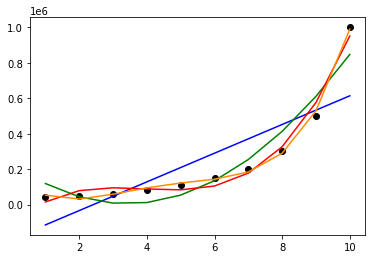

In [13]:
plt.scatter(X, y, color='black')
plt.plot(X, lin_reg.predict(X), color='b')
plt.plot(X, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)), color='g')
plt.plot(X, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)), color='r')
plt.plot(X, lin_reg_poly_4.predict(poly_reg_4.fit_transform(X)), color='darkorange')
plt.show()

In [14]:
print("--- LINEAR REGRESSION ---")
print("R2 {}".format(r2_score(y, lin_reg.predict(X))))
print("MSE {}".format(mean_squared_error(y, lin_reg.predict(X))))

--- LINEAR REGRESSION ---
R2 0.6690412331929895
MSE 26695878787.878788


In [15]:
print("--- POLYNOMIAL 2 ---")
print("R2 {}".format(r2_score(y, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)))))
print("MSE {}".format(mean_squared_error(y, lin_reg_poly_2.predict(poly_reg_2.fit_transform(X)))))

--- POLYNOMIAL 2 ---
R2 0.9162082221443942
MSE 6758833333.333334


In [16]:
print("--- POLYNOMIAL 3 ---")
print("R2 {}".format(r2_score(y, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)))))
print("MSE {}".format(mean_squared_error(y, lin_reg_poly_3.predict(poly_reg_3.fit_transform(X)))))

--- POLYNOMIAL 3 ---
R2 0.9812097727913367
MSE 1515662004.6620033


In [17]:
print("--- POLYNOMIAL 3 ---")
print("R2 {}".format(r2_score(y, lin_reg_poly_4.predict(poly_reg_4.fit_transform(X)))))
print("MSE {}".format(mean_squared_error(y, lin_reg_poly_4.predict(poly_reg_4.fit_transform(X)))))

--- POLYNOMIAL 3 ---
R2 0.9973922891706614
MSE 210343822.8438184
